### The value of $\alpha$

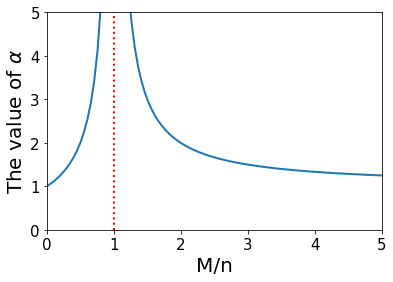

In [66]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

X = np.linspace(0, 5, 100)
y = [x/(x-1) if x > 1 else 1/(1-x)for x in X]

f = plt.figure()
plt.ylim((0, 5))
plt.xlim((0, 5))
plt.plot(X, y, markersize=10, linewidth=2)
plt.axvline(x=1, ymin=0, ymax=5, linestyle=':', color='r', linewidth=2)

plt.xlabel('M/n', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.ylabel('The value of $\\alpha$', fontsize=20)
f.savefig('./results/value_alpha.pdf', bbox_inches='tight')

## Exp 1: Approximation of Stochastic Gradients

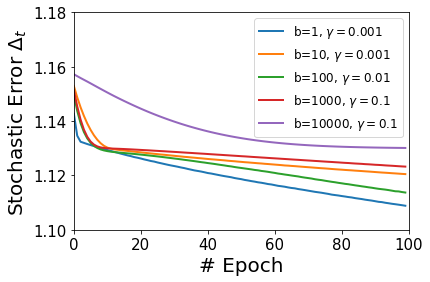

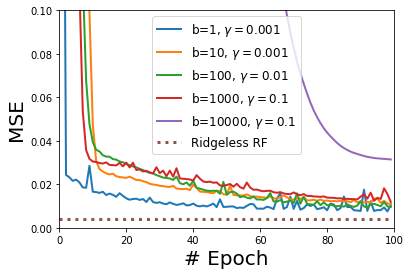

In [67]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

with open('./results/exp1_synthetic_nonlinear.pkl', 'rb') as f:
    data_ = pickle.load(f)

f = plt.figure()
plt.ylim((1.1, 1.18))
plt.xlim((0, 100))
plt.plot(data_[0]['difference_records'],linewidth=2)
plt.plot(data_[1]['difference_records'],linewidth=2)
plt.plot(data_[2]['difference_records'],linewidth=2)
plt.plot(data_[3]['difference_records'],linewidth=2)
plt.plot(data_[4]['difference_records'],linewidth=2)
# plt.plot(np.ones(100)*0.004,linewidth=3, linestyle=':')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel('# Epoch', fontsize=20)
plt.ylabel('Stochastic Error $\Delta_t$', fontsize=20)
plt.legend(['b=1, $\gamma=0.001$', 'b=10, $\gamma=0.001$', 'b=100, $\gamma=0.01$', 'b=1000, $\gamma=0.1$', 'b=10000, $\gamma=0.1$'], fontsize=12)
plt.show()
f.savefig('./results/exp1_approximation.pdf', bbox_inches='tight')

f = plt.figure()
plt.ylim((0, 0.1))
plt.xlim((0, 100))
plt.plot(data_[0]['validate_loss_records'],linewidth=2)
plt.plot(data_[1]['validate_loss_records'],linewidth=2)
plt.plot(data_[2]['validate_loss_records'],linewidth=2)
plt.plot(data_[3]['validate_loss_records'],linewidth=2)
plt.plot(data_[4]['validate_loss_records'],linewidth=2)
plt.plot(np.ones(100)*0.004,linewidth=3, linestyle=':')
plt.xlabel('# Epoch', fontsize=20)
plt.legend(['b=1, $\gamma=0.001$', 'b=10, $\gamma=0.001$', 'b=100, $\gamma=0.01$', 'b=1000, $\gamma=0.1$', 'b=10000, $\gamma=0.1$', 'Ridgeless RF'], fontsize=12)
plt.ylabel('MSE', fontsize=20)
plt.show()
f.savefig('./results/exp1_MSE.pdf', bbox_inches='tight')

### Exp 2: Approximation of random features

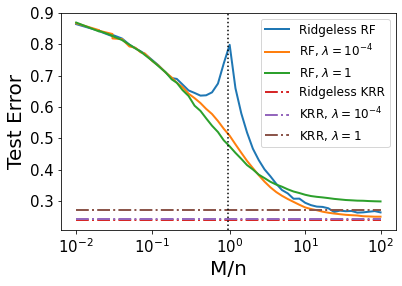

In [68]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

with open('./results/exp2_mnist.pkl', 'rb') as f:
    record_ = pickle.load(f)

index=[0,1,2]

f = plt.figure()
# plt.ylim((0.2, 0.9))
# plt.xlim((0, 100))
plt.plot(np.log10(record_['M_n_arr']), np.mean(record_['rf_error'][index,:], 2).T,linewidth=2)
plt.plot(np.log10(record_['M_n_arr']), np.mean(record_['kernel_error'][index,:], 2).T,linewidth=2, linestyle='-.')
plt.axvline(x=0, ymin=0, ymax=5, linestyle=':', color='k')
index = [0, 10, 23, 36, 49]
x_s = np.log10(record_['M_n_arr'])[index]
plt.xticks(x_s, [r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
plt.xlabel('M/n', fontsize=20)
plt.ylabel('Test Error', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.legend(['Ridgeless RF', 'RF, $\lambda=10^{-4}$', 'RF, $\lambda=1$', 'Ridgeless KRR', 'KRR, $\lambda=10^{-4}$', 'KRR, $\lambda=1$'], fontsize=12)
plt.show()
f.savefig('./results/exp2_mnist_error.pdf', bbox_inches='tight')

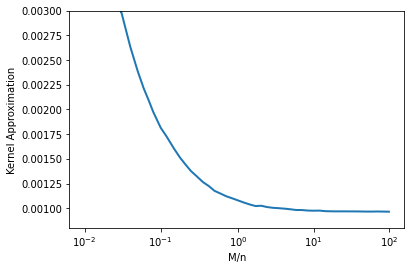

In [69]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

with open('./results/exp2_mnist.pkl', 'rb') as f:
    record_ = pickle.load(f)

f = plt.figure()
plt.ylim((0.0008, 0.003))
# plt.xlim((0, 100))
plt.plot(np.log10(record_['M_n_arr']), np.mean(record_['approx_arr'], 2)[0].T,linewidth=2)
index = [0, 10, 23, 36, 49]
x_s = np.log10(record_['M_n_arr'])[index]
plt.xticks(x_s, [r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'])
plt.xlabel('M/n')
plt.ylabel('Kernel Approximation')
plt.show()
f.savefig('./results/exp2_kernel_approximation.pdf', bbox_inches='tight')

### Exp 3: Tunable Kernel

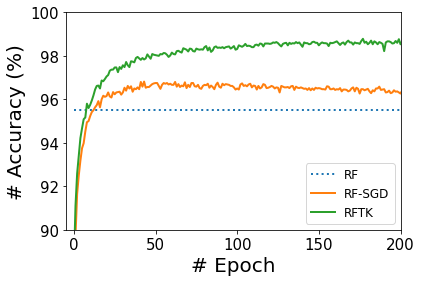

In [70]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

with open('./results/exp3_mnist.pkl', 'rb') as f:
    record_ = pickle.load(f)

RF_SGD = record_['results_rf_sgd'][0]
RFTK = record_['results_rf_tk_trace'][0]
RF = np.ones(len(RF_SGD['validate_accuracy_records'])) * 95.52

f = plt.figure()
plt.ylim(90, 100)
plt.xlim(-5,200)
# plt.plot(RFTK['training_regularaztion_phi_records'],linewidth=2)
plt.plot(RF,linewidth=2, linestyle=':')
plt.plot(RF_SGD['validate_accuracy_records'],linewidth=2)
plt.plot(RFTK['validate_accuracy_records'],linewidth=2)
plt.legend(['RF', 'RF-SGD', 'RFTK'], fontsize=12)
plt.xlabel('# Epoch', fontsize=20)
plt.ylabel('# Accuracy (%)', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.show()

f.savefig('./results/exp3_accuracy.pdf', bbox_inches='tight')

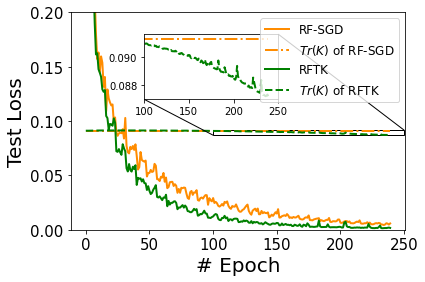

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

with open('./results/exp3_mnist.pkl', 'rb') as f:
    record_ = pickle.load(f)

RF_SGD = record_['results_rf_sgd'][0]
RFTK = record_['results_rf_tk'][0]

f, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.ylim(0, 0.2)
plt.plot(RF_SGD['training_loss_records'], linewidth=2, color='darkorange')
plt.plot(RF_SGD['training_regularaztion_phi_records'],linewidth=2, color='darkorange', linestyle='-.')
plt.plot(RFTK['training_loss_records'], linewidth=2, color='g')
plt.plot(RFTK['training_regularaztion_phi_records'],linewidth=2, color='g', linestyle='--')
plt.legend([ 'RF-SGD', '$Tr(K)$ of RF-SGD', 'RFTK', '$Tr(K)$ of RFTK'], fontsize=12)
plt.xlabel('# Epoch', fontsize=20)
plt.ylabel('Test Loss', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

axins = ax.inset_axes((0.22, 0.6, 0.4, 0.3))
axins.plot(RFTK['training_regularaztion_phi_records'],linewidth=2, color='g', linestyle='--')
axins.plot(RF_SGD['training_regularaztion_phi_records'],linewidth=2, color='darkorange', linestyle='-.')
axins.set_xlim(100, 250)
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='k', lw=1)


plt.show()

f.savefig('./results/exp3_loss.pdf', bbox_inches='tight')

### Exp 4: Real-world Datasets

In [72]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


with open('./results/exp4_acc.pkl', 'rb') as f:
    acc_arr = pickle.load(f)

datasets = ['dna', 'letter', 'pendigits', 'segment', 'satimage', 'usps', 'svmguide2', 'vehicle', 'vowel', 'wine', 'shuttle', 'Sensorless', 'mnist']
n_repeats = 10

acc_arr = np.empty((len(datasets), 5, n_repeats))
for (i, dataset) in enumerate(datasets):
    with open('{}/exp4_{}.pkl'.format('./results', dataset), 'rb') as f:
        record_=pickle.load(f)
    for t in range(n_repeats):
        if record_['KRR']:
            acc_arr[i][0][t] = 100 - 100 * record_['KRR'][t]
            acc_arr[i][1][t] = 100 - 100 * record_['KRidgeless'][t]
        else:
            acc_arr[i][0][t] = 0
            acc_arr[i][1][t] = 0
        acc_arr[i][2][t] = 100 - 100 * record_['RF'][t]
        acc_arr[i][3][t] = record_['RF_SGD'][t]['test_accuracy']
        acc_arr[i][4][t] = record_['RFTK'][t]['test_accuracy']

# print(acc_arr)
for (i, dataset) in enumerate(datasets):
    print('{}  &{:.2f}$\pm${:.2f}   &{:.2f}$\pm${:.2f}  &{:.2f}$\pm${:.2f}  &{:.2f}$\pm${:.2f}  &{:.2f}$\pm${:.2f} \\\\'.format(dataset, acc_arr[i][0].mean(), acc_arr[i][0].std(), 
    acc_arr[i][1].mean(), acc_arr[i][1].std(),
    acc_arr[i][2].mean(), acc_arr[i][2].std(),
    acc_arr[i][3].mean(), acc_arr[i][3].std(), 
    acc_arr[i][4].mean(), acc_arr[i][4].std()))

dna  &52.83$\pm$1.66   &49.67$\pm$18.54  &52.83$\pm$1.66  &51.33$\pm$1.89  &92.92$\pm$0.89 \\
letter  &96.54$\pm$0.25   &96.40$\pm$0.15  &95.33$\pm$0.32  &91.74$\pm$0.46  &96.17$\pm$0.29 \\
pendigits  &97.46$\pm$0.42   &90.67$\pm$4.75  &96.91$\pm$0.43  &46.04$\pm$5.62  &98.64$\pm$0.43 \\
segment  &82.99$\pm$1.85   &56.71$\pm$10.71  &83.44$\pm$1.69  &37.75$\pm$9.11  &94.55$\pm$1.52 \\
satimage  &90.43$\pm$0.48   &88.79$\pm$0.77  &87.67$\pm$0.89  &90.33$\pm$1.36  &90.79$\pm$1.23 \\
usps  &92.49$\pm$0.70   &87.47$\pm$7.38  &94.38$\pm$0.60  &49.81$\pm$3.52  &97.29$\pm$0.61 \\
svmguide2  &81.90$\pm$2.78   &70.13$\pm$4.91  &66.20$\pm$4.64  &81.65$\pm$4.25  &82.78$\pm$4.84 \\
vehicle  &63.00$\pm$2.80   &79.35$\pm$2.89  &75.94$\pm$2.88  &74.24$\pm$3.92  &80.06$\pm$4.49 \\
vowel  &77.45$\pm$3.08   &71.79$\pm$11.92  &88.77$\pm$1.49  &46.89$\pm$6.10  &81.70$\pm$5.47 \\
wine  &39.17$\pm$6.27   &48.89$\pm$13.68  &91.11$\pm$19.40  &43.89$\pm$6.19  &98.33$\pm$1.36 \\
shuttle  &0.00$\pm$0.00   &0.00$\